# What will we cover in this Notebook?

*  Edge Detection

* Mouse in OpenCV GUI

* Contour Detection using OpenCV

In [1]:
cd C:\Users\aghon\Desktop\Upwork\Eng_mohamed\Learning\opencv

In [2]:
import cv2
 
# Read the original image
img = cv2.imread('1635660084639.png')
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()


ddepth means desired depth of the destination image

It has information about what kinds of data stored in an image, and that can be unsigned char (CV_8U), signed char (CV_8S), unsigned short (CV_16U), and so on...


ddepth	the output image depth (-1 to use src.depth()).


## Canny Edge Detection
Canny Edge Detection is one of the most popular edge-detection methods in use today because it is so robust and flexible.The algorithm itself follows a three-stage process for extracting edges from an image. Add to it image blurring, a necessary preprocessing step to reduce noise. This makes it a four-stage process, which includes:

* Noise Reduction
* Calculating Intensity Gradient of the Image
* Suppression of False Edges
* Hysteresis Thresholding


## Mouse and Trackbar in OpenCV GUI


In [17]:
# Import packages
import cv2
 
# Lists to store the bounding box coordinates
top_left_corner=[]
bottom_right_corner=[]
 
# function which will be called on mouse input
def drawRectangle(action, x, y, flags, *userdata):
  # Referencing global variables
  global top_left_corner, bottom_right_corner
  # Mark the top left corner when left mouse button is pressed
  if action == cv2.EVENT_LBUTTONDOWN:
    top_left_corner = [(x,y)]
    # When left mouse button is released, mark bottom right corner
  elif action == cv2.EVENT_LBUTTONUP:
    bottom_right_corner = [(x,y)]   
    # Draw the rectangle
    cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0,255,0),2, 8)
    cv2.imshow("Window",image)
 
# Read Images
image = cv2.imread("1635660084639.png")
# Make a temporary image, will be useful to clear the drawing
temp = image.copy()
# Create a named window
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)
 

In [18]:
k=0
# Close the window when key q is pressed
while k!=113:              # mean q in ASIC
  # Display the image
  cv2.imshow("Window", image)
  k = cv2.waitKey(0)
  # If c is pressed, clear the window, using the dummy image
  if (k == 99):
    image= temp.copy()
    cv2.imshow("Window", image)
 
cv2.destroyAllWindows()


In [19]:
top_left_corner

[(504, 167)]

In [20]:
bottom_right_corner

[(335, 322)]

## Contour Detection using OpenCV

### What are Contours?

* When we join all the points on the boundary of an object, we get a contour
* specific contour refers to boundary pixels that have the same color and intensity

---

 CV2 provides two simple functions:

* findContours()

* drawContours()


Also, it has two different algorithms for contour detection:

* CHAIN_APPROX_SIMPLE

* CHAIN_APPROX_NONE

---

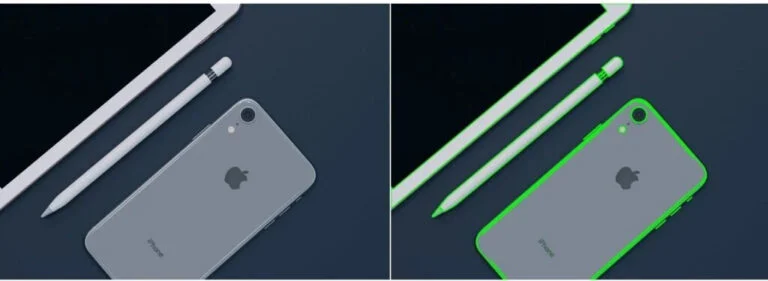

### Steps for Detecting and Drawing Contours in OpenCV

1. Read the Image and convert it to Grayscale Format

2. Apply Binary Thresholding

3. Find the Contours

4. Draw Contours on the Original RGB Image

In [23]:
import cv2
image = cv2.imread('test.jpg')

# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

In [24]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
               
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

## Using Single Channel: Red, Green, or Blue  (test)


In [25]:
import cv2

# read the image
image = cv2.imread('test.jpg')

# B, G, R channel splitting
blue, green, red = cv2.split(image)

# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
cv2.imshow('Contour detection using blue channels only', image_contour_blue)
cv2.waitKey(0)
cv2.imwrite('blue_channel.jpg', image_contour_blue)
cv2.destroyAllWindows()

# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
cv2.imshow('Contour detection using green channels only', image_contour_green)
cv2.waitKey(0)
cv2.imwrite('green_channel.jpg', image_contour_green)
cv2.destroyAllWindows()

# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_red = image.copy()
cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
cv2.imshow('Contour detection using red channels only', image_contour_red)
cv2.waitKey(0)
cv2.imwrite('red_channel.jpg', image_contour_red)
cv2.destroyAllWindows()

### Drawing Contours using CHAIN_APPROX_SIMPLE


In [26]:
"""
Now let's try with `cv2.CHAIN_APPROX_SIMPLE`
"""
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('Simple approximation', image_copy1)
cv2.waitKey(0)
cv2.imwrite('contours_simple_image1.jpg', image_copy1)
cv2.destroyAllWindows()

**If you observe closely, there are almost no differences between the outputs of CHAIN_APPROX_NONE and CHAIN_APPROX_SIMPLE.**

### why is that?

**The credit goes to the drawContours() function. Although the CHAIN_APPROX_SIMPLE method typically results in fewer points, the drawContours() function automatically connects adjacent points, joining them even if they are not in the contours list.**



In [2]:
import numpy as np
import cv2
from skimage import data, filters

# Open Video
cap = cv2.VideoCapture('bandicam.mp4')

# Randomly select 25 frames
frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=25)

# Store selected frames in an array
frames = []
for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)

# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    

# Display median frame
cv2.imshow('frame', medianFrame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Reset frame number to 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Convert background to grayscale
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)

# Loop over all frames
ret = True
while(ret):

  # Read frame
  ret, frame = cap.read()
  # Convert current frame to grayscale
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Calculate absolute difference of current frame and 
  # the median frame
  dframe = cv2.absdiff(frame, grayMedianFrame)
  # Treshold to binarize
  th, dframe = cv2.threshold(dframe, 30, 255, cv2.THRESH_BINARY)
  # Display image
  cv2.imshow('frame', dframe)
  key = cv2.waitKey(20)
    
  if key == ord('q'):
    break

# Release video object
cap.release()

# Destroy all windows
cv2.destroyAllWindows()
